## PART 2: EDA & Data Analysis ( + 파생변수 생성)

#### 1. keyword_df

##### 1-1. 워드클라우드

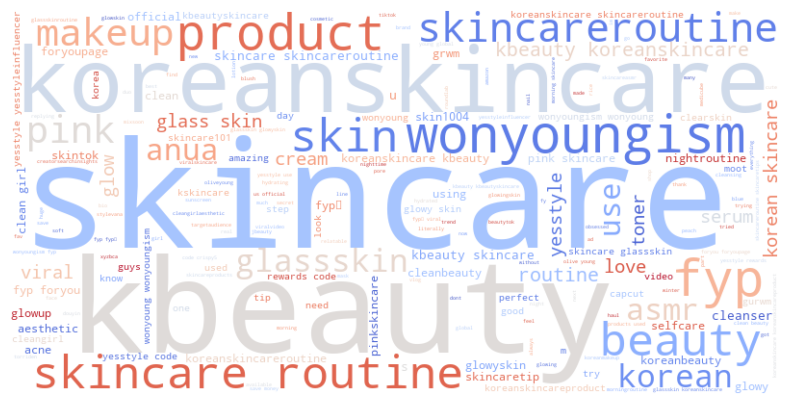

In [ ]:
# keyword_df 영상설명 워드클라우드
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', colormap='coolwarm').generate(' '.join(keyword_df['cleaned_info'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Tiktok Vedio Information")
plt.show()

In [ ]:
# keyword_df 해시태그 일렬로 정렬
tag_final_list = []
for i in range(len(keyword_df)):
    tags = str(keyword_df['hash_tag'][i])
    tags_list = tags.split(',')
    tag_final_list.append(tags_list)
tag_flat_list = sum(tag_final_list,[])
tag_df = pd.DataFrame({'tag':tag_flat_list})
tag_df

,tag
0,@user8022071884889
1,#greenscreen
2,#cleansers
3,#skincare
4,#beauty
...,...
6563,#koreanskincare
6564,#gurwm
6565,#gurwmroutine
6566,#grwm


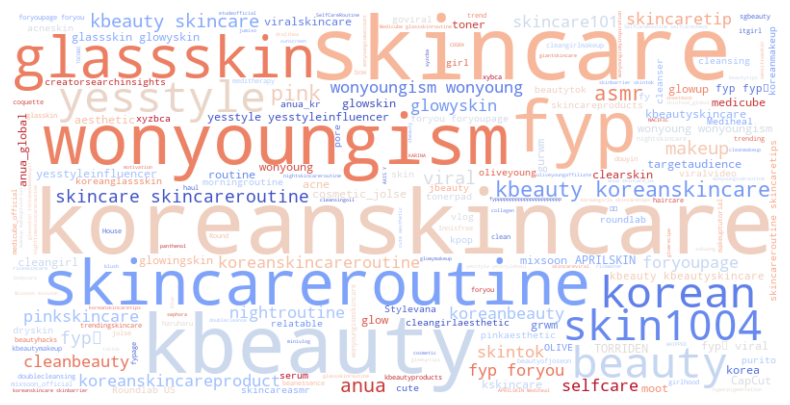

In [ ]:
# keyword_df 해시태 워드클라우드
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', colormap='coolwarm').generate(' '.join(tag_df['tag'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Tiktok Vedio Hash_tag")
plt.show()

##### 1-2. 자주 노출되는 인플루언서
- kbeauty인플루언서들 최신 영상 30개씩 추출할 때 사용 -> tiktoker_df생성
- 편의상 tiktoker_df 전처리도 위에서 진행함

In [ ]:
# Float 형식을 일반 숫자 형식으로 변경
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# kbeauty관련 키워드들 입력시 알고리즘에 의해 노출되는 모든 인플루언서들
keyword_df['tiktoker_name'].nunique()

358

In [ ]:
# kbeauty관련 키워드들 입력 시 틱톡 알고리즘에 의해 3번 이상 노출된 인풀루우언서들
# 58명 / 358명명 -> tiktoker_df만들 때 사용됨 
tiktoker_cnt = keyword_df['tiktoker_name'].value_counts().reset_index()
tiktoker_cnt[tiktoker_cnt['count'] >= 3]

,tiktoker_name,count
0,mydelicate,37
1,velcroluv,33
2,caspertheghostyy,20
3,bwnniewony,17
4,milkydew,15
5,aeiezo.pdf,15
6,emchu_,14
7,songofskin,13
8,4chriisty,13
9,dearwonii_,11


##### 1-3. 업로드 일자

In [ ]:
# upload_date를 20YY-MM 형식으로 변환
def upload_y_m(df):
    df['upload_date_str'] = df['upload_date'].astype(str)
    for i in range(len(df)):
        date = df['upload_date_str'][i]
        y_m = date[:7]
        df.loc[i,'upload_y_m'] = y_m

upload_y_m(keyword_df)

In [ ]:
date_groupby = keyword_df.groupby('upload_y_m')['search_term'].count().reset_index()
date_groupby

,upload_y_m,search_term
0,2020-02,1
1,2020-03,2
2,2020-05,2
3,2020-11,1
4,2021-02,1
5,2021-03,1
6,2021-05,1
7,2021-06,1
8,2021-07,2
9,2021-08,2


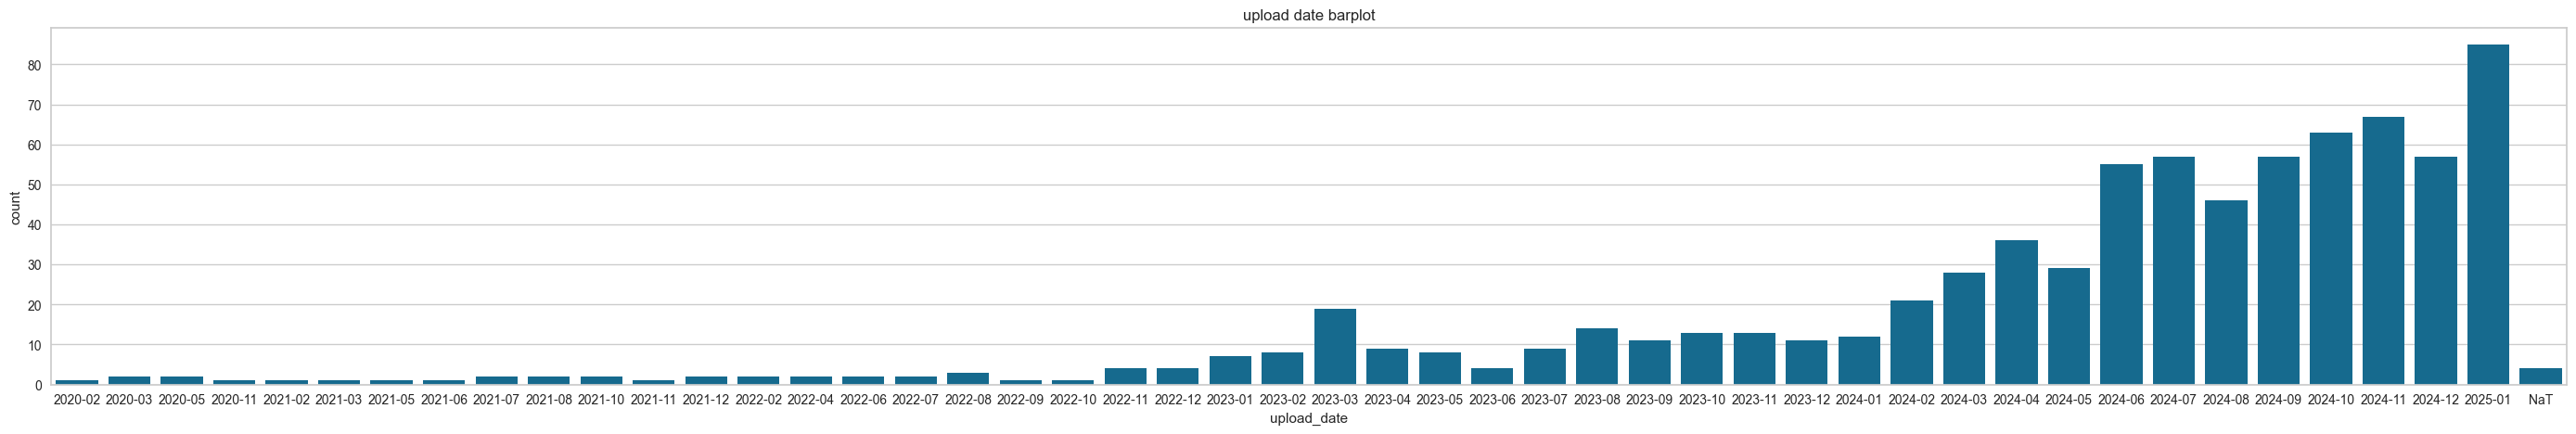

In [ ]:
date_groupby = keyword_df.groupby('upload_y_m')['search_term'].count().reset_index()

fig, axes = plt.subplots(figsize=(35, 5), sharex=False)
sns.barplot(x='upload_y_m', y='search_term', data=date_groupby)
plt.title('upload date barplot')
plt.xlabel('upload_date')
plt.ylabel('count')
plt.show()

##### 1-4. 최근 영상들 k-beauty관련 주요 해시태그

In [ ]:
# 최근 올라온 영상상
recent_df = keyword_df[keyword_df['upload_date']>='2024-06-01']
recent_df.head(3)

,search_term,vedio_order,tiktoker_name,upload_date,like_cnt,comment_cnt,save_cnt,info,hash_tag,cleaned_info,cleaned_hash_tag,tokenized_info,tokenized_hash_tag,removed_info,removed_hash_tag,stpw_processed_info,stpw_processed_hash_tag,upload_date_str,upload_y_m
0,clean_beauty,1,morganlkeen,2024-09-05,1563,73,894,Replying to @user8022071884889 Non-Toxic Makeu...,@user8022071884889,replying to nontoxic makeup blushes powder cr...,,"[replying, to, nontoxic, makeup, blushes, powd...",[],"[replying, nontoxic, makeup, blushes, powder, ...",[],"[repli, nontox, makeup, blush, powder, cream, ...",[],2024-09-05,2024-09
1,clean_beauty,2,therealkatiestone,2025-01-03,1337,102,189,#greenscreen new year new diagram #cleansers #...,"#greenscreen,#cleansers,#skincare,#beauty,#bea...",greenscreen new year new diagram cleansers ski...,greenscreencleansersskincarebeautybeautybrandw...,"[greenscreen, new, year, new, diagram, cleanse...",[greenscreencleansersskincarebeautybeautybrand...,"[greenscreen, new, year, new, diagram, cleanse...",[greenscreencleansersskincarebeautybeautybrand...,"[greenscreen, new, year, new, diagram, cleanse...",[greenscreencleansersskincarebeautybeautybrand...,2025-01-03,2025-01
3,clean_beauty,4,balancewithani,2024-07-02,831,32,432,I've been looking for a non-toxic beauty brand...,,ive been looking for a nontoxic beauty brand t...,,"[ive, been, looking, for, a, nontoxic, beauty,...",[],"[ive, looking, nontoxic, brand, actually, work...",[],"[ive, look, nontox, brand, actual, work, im, s...",[],2024-07-02,2024-07


In [ ]:
txt = ""
for t in recent_df["hash_tag"]:
    txt += str(t) + ","

# 태그를 분리하여 DataFrame 생성
tag_df = pd.DataFrame(txt.split(","), columns=["tag"])  

tag_df = tag_df[tag_df["tag"].str.strip() != ""]

# 태그별 등장 횟수 계산
tag_counts = tag_df["tag"].value_counts()

print(tag_counts)


tag
#kbeauty            286
#koreanskincare     253
#skincare           247
#wonyoungism        194
#fyp                134
                   ... 
#peeloffmask          1
@miguhara_global      1
#xyzbcafypシ           1
#acnefighter          1
#gurwmroutine         1
Name: count, Length: 966, dtype: int64


In [ ]:
tag_count =  tag_df["tag"].value_counts().reset_index()
tag_count = tag_count[tag_count['count'] >= 5]
tag_count

,tag,count
0,#kbeauty,286
1,#koreanskincare,253
2,#skincare,247
3,#wonyoungism,194
4,#fyp,134
...,...,...
159,#arencia,5
160,#ricewater,5
161,#skincareviral,5
162,#hyperpigmentation,5


c:\Users\user\Desktop\databootcamp\tiktok_test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\databootcamp\tiktok_test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\Desktop\databootcamp\tiktok_test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


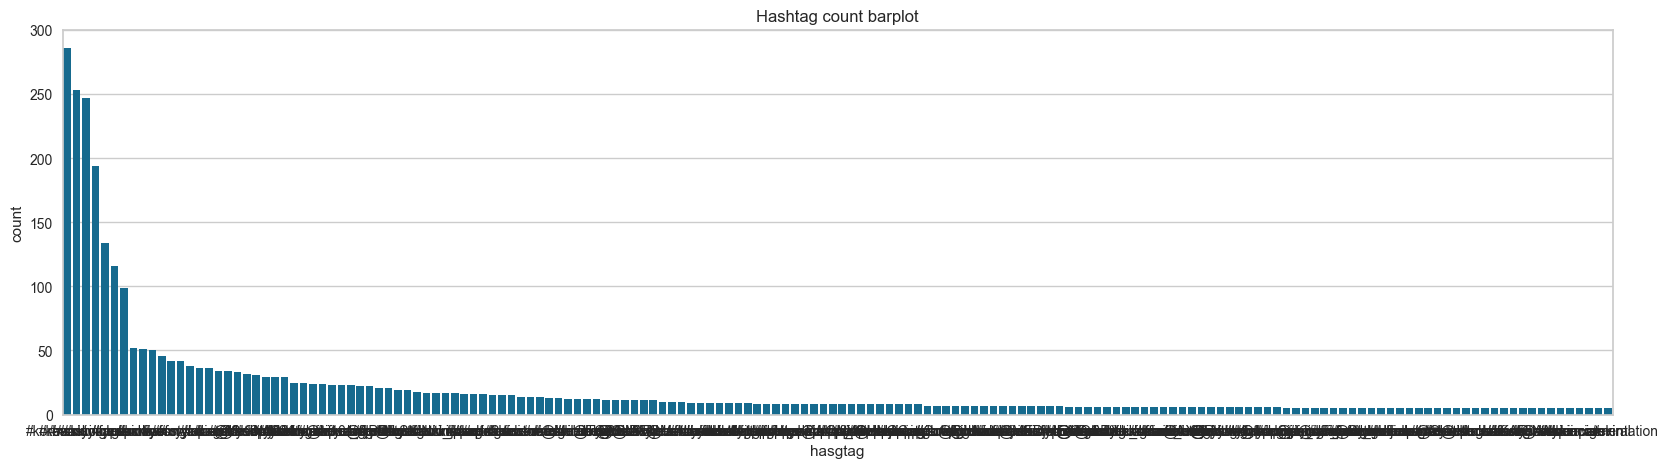

In [ ]:
fig, axes = plt.subplots(figsize=(20, 5), sharex=False)
sns.barplot(x='tag', y='count', data=tag_count)
plt.title('Hashtag count barplot')
plt.xlabel('hasgtag')
plt.ylabel('count')
plt.show()

In [ ]:
# 상위 35개 해시태그
tag_count[tag_count['count']>=20]
# skincare, koreanskincare, kbeauty
# skincareroutine, glassskin, 
# glowyskin, viral, skintok, cleanbeauty, skincaretips, asmr, glowup, anua, pink, clearskin

# 우리 회사랑 잘 어울리는 해시태그
# skintok, #ASMR

,tag,count
0,#kbeauty,286
1,#koreanskincare,253
2,#skincare,247
3,#wonyoungism,194
4,#fyp,134
5,#skincareroutine,116
6,#glassskin,99
7,#pink,52
8,#korean,51
9,#wonyoung,50


In [ ]:
# 태그 별 영상 수 및 총 좋아요 수 계산

recent_df['hash_tag'] = recent_df['hash_tag'].astype(str)

# 태그별 영상 수 및 총 좋아요 수 계산
tag_count['video_cnt'] = 0
tag_count['total_like'] = 0

recent_df['idx'] = recent_df.index

# ✅ 한 영상에서 한 태그가 한 번만 카운트되도록 처리
for i in range(len(tag_count)):
    tag = tag_count.loc[i, 'tag']
    
    # 해당 태그를 포함하는 영상 필터링
    matched_videos = recent_df[recent_df['hash_tag'].str.contains(tag, regex=False)].copy()
    
    # 🎯 각 video_id가 중복되지 않도록 unique한 영상 수만 계산
    tag_count.loc[i, 'video_cnt'] = matched_videos['idx'].nunique()
    
    # 🎯 같은 영상 내 여러 태그 중복 집계를 방지하여 총 좋아요 수 계산
    tag_count.loc[i, 'total_like'] = matched_videos.groupby('idx')['like_cnt'].first().sum()

# 결과 출력
display(tag_count)

C:\Users\user\AppData\Local\Temp\ipykernel_332\1271812237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['hash_tag'] = recent_df['hash_tag'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_332\1271812237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['idx'] = recent_df.index


,tag,count,video_cnt,total_like
0,#kbeauty,286,286,15437135
1,#koreanskincare,253,258,22538551
2,#skincare,247,316,22013606
3,#wonyoungism,194,191,8441067
4,#fyp,134,150,6892134
...,...,...,...,...
159,#arencia,5,5,1315700
160,#ricewater,5,5,1247470
161,#skincareviral,5,5,16303
162,#hyperpigmentation,5,5,1120524


In [ ]:
# 해시태그별 평균 좋아요수
tag_count['like_mean'] = tag_count['total_like']/tag_count['video_cnt']
tag_count

,tag,count,video_cnt,total_like,like_mean
0,#kbeauty,286,286,15437135,53976.00
1,#koreanskincare,253,258,22538551,87358.72
2,#skincare,247,316,22013606,69663.31
3,#wonyoungism,194,191,8441067,44194.07
4,#fyp,134,150,6892134,45947.56
...,...,...,...,...,...
159,#arencia,5,5,1315700,263140.00
160,#ricewater,5,5,1247470,249494.00
161,#skincareviral,5,5,16303,3260.60
162,#hyperpigmentation,5,5,1120524,224104.80


In [ ]:
# 사용된 영상 개수가 30개 이상인 해시태그
tag_count[tag_count['video_cnt'] >= 30]
tag_count.sort_values('video_cnt',ascending=False)

,tag,count,video_cnt,total_like,like_mean
163,#skin,5,333,23452325,70427.40
2,#skincare,247,316,22013606,69663.31
62,#korea,11,308,25659879,83311.30
8,#korean,51,305,24535245,80443.43
0,#kbeauty,286,286,15437135,53976.00
...,...,...,...,...,...
143,#koreanmakeup,5,5,476570,95314.00
153,#mixsooncentella,5,4,22779,5694.75
138,@Stylevana,5,4,28168,7042.00
131,#wonyoungismyinspiration,5,3,319424,106474.67


C:\Users\user\AppData\Local\Temp\ipykernel_332\2644514969.py:22: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) Arial.
  fig.tight_layout()
c:\Users\user\Desktop\databootcamp\tiktok_test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


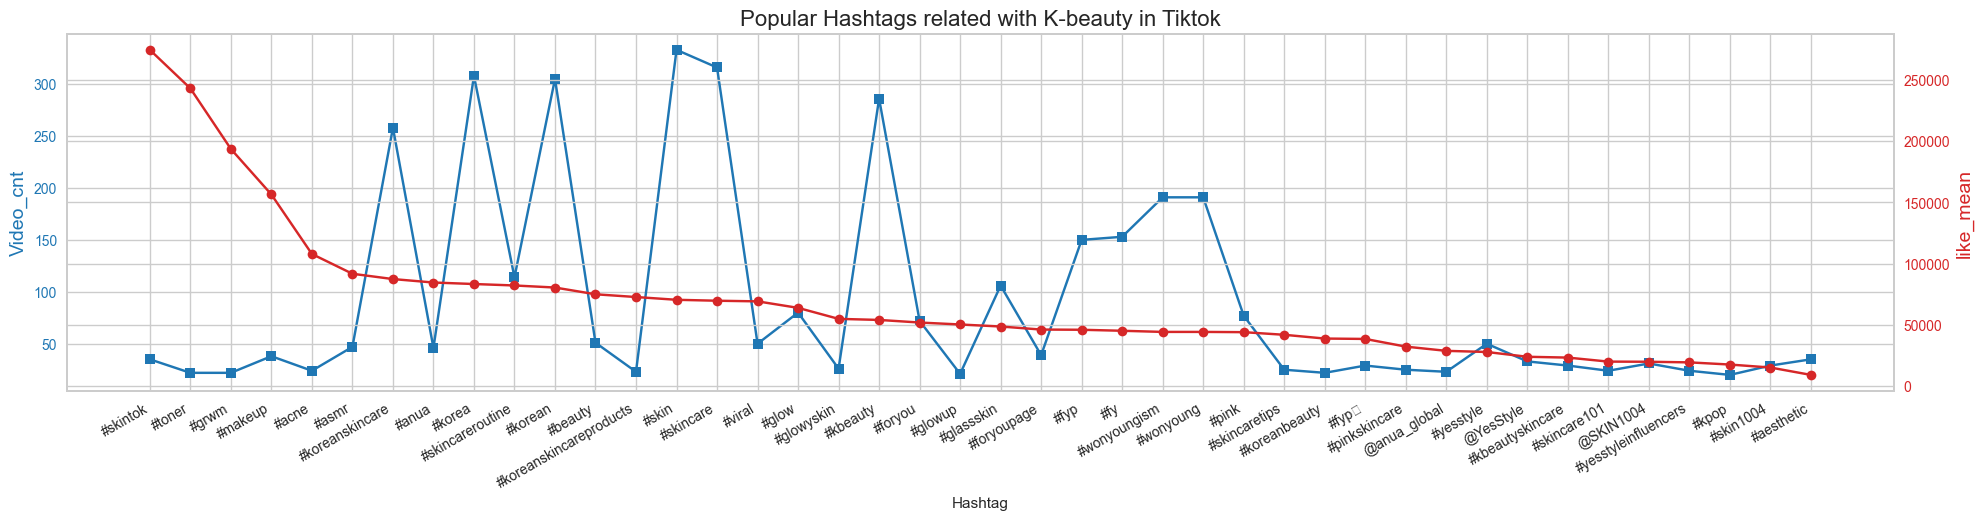

In [ ]:
# 20개 이상 영상에서 사용된 해시태그 들의 사용된 영상 개수 대비 좋아요 수
temp = tag_count[tag_count['video_cnt'] >= 20].reset_index(drop=True)
temp = temp.sort_values('like_mean', ascending=False).reset_index(drop=True)

# left side : vedio_cnt
fig, ax1 = plt.subplots(figsize=(20, 5), sharex=False)
color_1 = 'tab:blue'
ax1.set_title('Popular Hashtags related with K-beauty in Tiktok', fontsize=16)
ax1.set_xlabel('Hashtag')
ax1.set_ylabel('Video_cnt', fontsize=14, color=color_1)
ax1.plot(temp.tag, temp.video_cnt, marker='s', color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side : like_mean
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('like_mean', fontsize=14, color=color_2)
ax2.plot(temp.tag, temp.like_mean, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

# Rotate x-axis labels by 45 degrees
fig.tight_layout()
plt.xticks(rotation=45)

# To make sure the x-axis labels don't overlap and fit properly
fig.autofmt_xdate()

plt.show()

In [ ]:
temp.to_csv('popular_tag.csv',index=False, encoding="utf-8-sig")

#### 2. tiktoker_df

##### 2-1. 인플루언서 사이즈 구분 및 광고 단가 추정치
- 나노 인플루언서 (1,000–10,000 팔로워): 게시물당 $5~$25
- 마이크로 인플루언서 (10,000–100,000 팔로워): 게시물당 $25~$125
- 중간급 인플루언서 (100,000–500,000 팔로워): 게시물당 $125~$1,200
- 매크로 인플루언서 (500,000–1백만 팔로워): 게시물당 $1,200~$2,500
- 메가 인플루언서 (1백만+ 팔로워): 게시물당 $2,500 이상

In [ ]:
# 최소 광고비용 컬럼 파생변수 생성
def min_ad_cost_range(df):
    for i in range(len(df)):
        if df['follower_cnt'][i] >= 1000000:
            df.loc[i, 'tiktoker_size'] = 'mega_influancer'
            df.loc[i, 'ad_cost'] = df['follower_cnt'][i]*20000 # 숫자로 설정
        elif df['follower_cnt'][i] >= 500000:
            df.loc[i, 'tiktoker_size'] = 'mekro_influancer'
            df.loc[i, 'ad_cost'] = df['follower_cnt'][i]*20000
        elif df['follower_cnt'][i] >= 100000:
            df.loc[i, 'tiktoker_size'] = 'middle_influancer'
            df.loc[i, 'ad_cost'] = df['follower_cnt'][i]*20000
        elif df['follower_cnt'][i] >= 10000:
            df.loc[i, 'tiktoker_size'] = 'micro_influancer'
            df.loc[i, 'ad_cost'] = df['follower_cnt'][i]*20000
        elif df['follower_cnt'][i] >= 1000:
            df.loc[i, 'tiktoker_size'] = 'nano_influancer'
            df.loc[i, 'ad_cost'] = df['follower_cnt'][i]*20000
        else:
            df.loc[i, 'tiktoker_size'] = 'under_influancer'
            df.loc[i, 'ad_cost'] = 0 
min_ad_cost_range(tiktoker_df)

##### 2-2. 평균 업로드 주기 계산(파생변수 생성)

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta

# ✅ 현재 날짜 기준
TODAY = datetime(2025, 1, 27)  # 현재 날짜 설정

# ✅ 'date' 열을 변환하는 함수 (에러 방지 추가)
def parse_date(date_str):
    date_str = str(date_str).strip().lower()  # 공백 제거, 소문자 변환

    # 1️⃣ MM-DD 형식 변환 (예: "1-14" → 2025-01-14)
    match_mmdd = re.fullmatch(r"(\d{1,2})-(\d{1,2})", date_str)
    if match_mmdd:
        month, day = map(int, match_mmdd.groups())  # 월, 일 추출
        return datetime(2025, month, day)  # 2025년으로 변환

    # 2️⃣ 숫자 + 단위(h, d, w) 변환 (예: "14h", "3d", "2w")
    match_relative = re.fullmatch(r"(\d+)([hdw])(?:\s*ago)?", date_str)  # " ago" 처리 추가
    if match_relative:
        num, unit = int(match_relative.group(1)), match_relative.group(2)  # 숫자, 단위 분리
        
        if unit == "h":  # 시간 단위
            return TODAY - timedelta(hours=num)
        elif unit == "d":  # 일 단위
            return TODAY - timedelta(days=num)
        elif unit == "w":  # 주 단위 (1주 = 7일)
            return TODAY - timedelta(weeks=num)

    # 3️⃣ 날짜 형식(YYYY-MM-DD) 변환
    try:
        return pd.to_datetime(date_str)  # YYYY-MM-DD 형식 변환
    except Exception as e:
        print(f"Failed to parse date: {date_str}. Error: {e}")
        return np.nan  # 변환 실패 시 NaT 반환

# ✅ 'date' 열 변환
tiktoker_df["upload_date"] = tiktoker_df["upload_date"].apply(parse_date)

# ✅ name 별로 업로드 간격 계산
tiktoker_df = tiktoker_df.sort_values(by=["name", "upload_date"])  # 이름 + 날짜순 정렬
tiktoker_df["prev_date"] = tiktoker_df.groupby("name")["upload_date"].shift(1)  # 이전 영상 날짜
tiktoker_df["upload_gap"] = (tiktoker_df["upload_date"] - tiktoker_df["prev_date"]).dt.days  # 간격(일)

# ✅ 평균 업로드 주기 계산
upload_cycle = tiktoker_df.groupby("name")["upload_gap"].mean().reset_index()
upload_cycle.rename(columns={"upload_gap": "avg_upload_interval"}, inplace=True)

# ✅ 결과 출력
print(upload_cycle)

                 name  avg_upload_interval
0       .blissdiaries                 4.07
1             .m.egan                 5.03
2            .woniluv                 2.38
3           4chriisty                 2.48
4          __.annie.s                 3.14
5         _luvwonsnnx                 1.48
6          aeiezo.pdf                 3.48
7     ameenbeautytips                 0.17
8           amyflamy1                 1.45
9           asiamelon                 3.34
10           ayheyt3u                 5.76
11         aylennpark                 1.62
12         bwnniewony                 1.93
13   caspertheghostyy                 0.83
14     cleangirlhacks                 3.03
15   cleanlivingkarly                 0.55
16         danicolexx                 0.31
17         dearwonii_                 2.66
18             emchu_                 3.41
19          fromh1ae_                 2.21
20            gae4hrv                 3.59
21     glowupwithinah                 0.24
22         

In [ ]:
# ✅ 1차 차분(변화량) 계산
tiktoker_df["upload_gap_diff"] = tiktoker_df.groupby("name")["upload_gap"].diff()

# ✅ 평균 변화량 (주기의 평균 변화 속도)
gap_trend = tiktoker_df.groupby("name")["upload_gap_diff"].mean().reset_index()
gap_trend.rename(columns={"upload_gap_diff": "avg_upload_gap_change"}, inplace=True)

tiktoker_df['avg_upload_gap_change'] = gap_trend['avg_upload_gap_change']

In [ ]:
tiktoker_df.head(3)

,name,follower_cnt,info,hash_tag,upload_date,view_cnt,like_cnt,comment_cnt,save_cnt,cleaned_info,...,removed_info,removed_hash_tag,stpw_processed_info,stpw_processed_hash_tag,tiktoker_size,ad_cost,prev_date,upload_gap,upload_gap_diff,avg_upload_gap_change
299,.blissdiaries,81700.00,I recieved this product for free from picky an...,"@Picky,@Picky,@numbuzin,#foryou,#pickyreview,#...",2024-09-23,9209,807,48,92,i recieved this product for free from picky an...,...,"[recieved, free, picky, numbuzin, exchange, ho...",[foryoupickyreviewgopickypickyxnumbuzinnumbuzi...,"[reciev, free, picki, numbuzin, exchang, hones...",[foryoupickyreviewgopickypickyxnumbuzinnumbuzi...,micro_influancer,1634000000.00,NaT,NaN,NaN,NaN
298,.blissdiaries,81700.00,I recieved this product for free from picky an...,"@Picky,@Picky,@Dr.G,#foryou,#pickyreview,#gopi...",2024-09-27,8462,923,46,116,i recieved this product for free from picky an...,...,"[recieved, free, picky, drg, exchange, honest,...",[gforyoupickyreviewgopickypickyxdrgdrgkbeautyw...,"[reciev, free, picki, drg, exchang, honest, re...",[gforyoupickyreviewgopickypickyxdrgdrgkbeautyw...,micro_influancer,1634000000.00,2024-09-23,4.00,NaN,NaN
295,.blissdiaries,81700.00,yesstyle perfect lips mix & match- swatches 🎀🩰...,"@YesStyleInfluencers,#fyp,#foryou,#yesstyle,#y...",2024-09-28,16300,2106,62,298,yesstyle perfect lips mix match swatches 🎀🩰 u...,...,"[yesstyle, perfect, lips, mix, match, swatches...",[fypforyouyesstyleyesstyleinfluencersyesstyleb...,"[yesstyl, perfect, lip, mix, match, swatch, 🎀🩰...",[fypforyouyesstyleyesstyleinfluencersyesstyleb...,micro_influancer,1634000000.00,2024-09-27,1.00,-3.00,NaN


In [ ]:
tiktoker_df.groupby('name')['upload_gap'].mean()

name
.blissdiaries        4.07
.m.egan              5.03
.woniluv             2.38
4chriisty            2.48
__.annie.s           3.14
_luvwonsnnx          1.48
aeiezo.pdf           3.48
ameenbeautytips      0.17
amyflamy1            1.45
asiamelon            3.34
ayheyt3u             5.76
aylennpark           1.62
bwnniewony           1.93
caspertheghostyy     0.83
cleangirlhacks       3.03
cleanlivingkarly     0.55
danicolexx           0.31
dearwonii_           2.66
emchu_               3.41
fromh1ae_            2.21
gae4hrv              3.59
glowupwithinah       0.24
haruqhxz             5.62
heartsfor.kbeauty    2.59
its.kaylas           1.31
itsedonna            1.31
izzydiaries          3.38
jaerini              9.14
jasminnlily_         2.24
jeb_bi               1.86
koocat               1.72
krystallee2222       2.24
kwyeona              2.31
lovelymiri05         0.62
luvsfor.jennie       1.21
milkydew             0.52
minseonk1m           0.83
misscasxie           4.48
monakoa

##### 2-3. 업로드 일자

In [ ]:
def upload_y_m(df):
    df['upload_date_str'] = df['upload_date'].astype(str)
    for i in range(len(df)):
        date = df['upload_date_str'][i]
        y_m = date[:7]
        df.loc[i,'upload_y_m'] = y_m

upload_y_m(tiktoker_df)

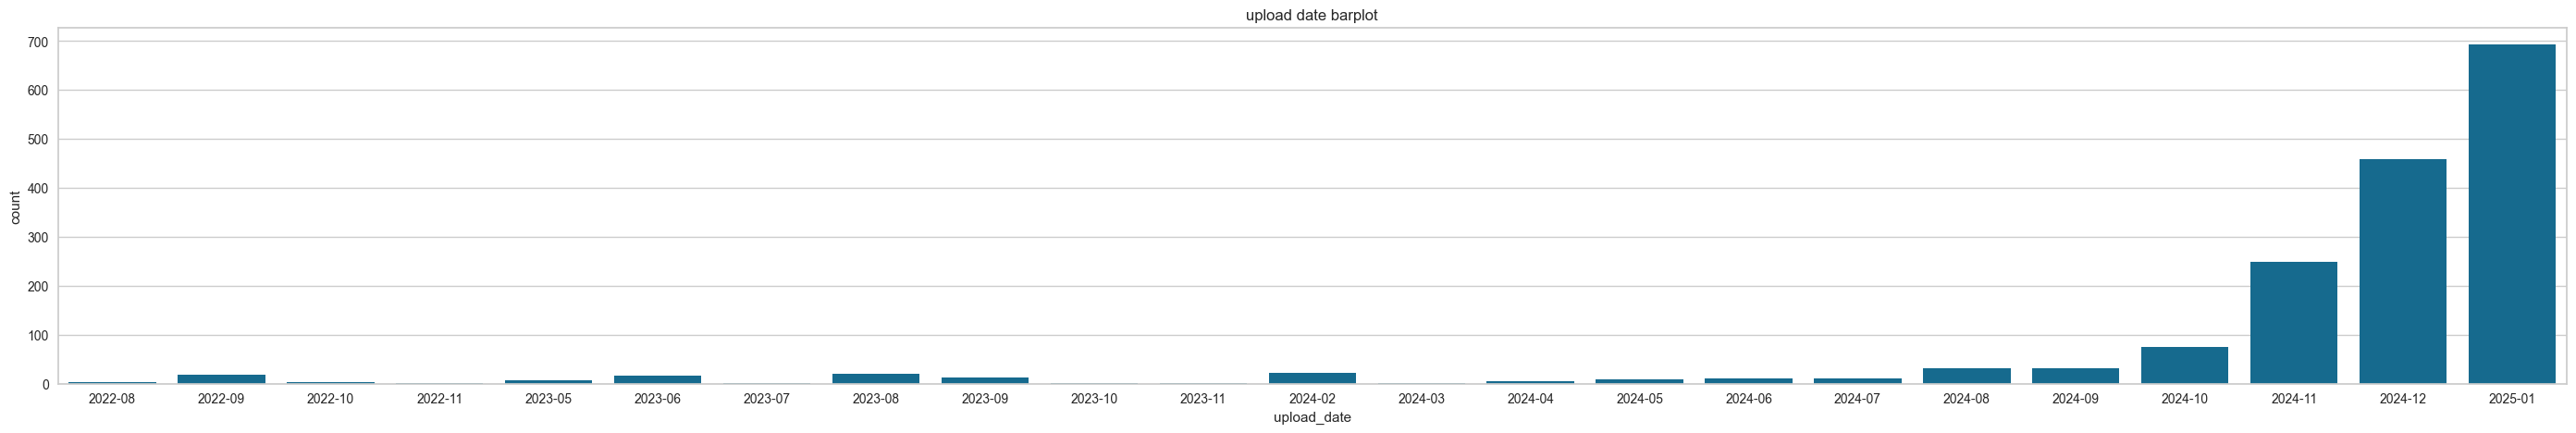

In [ ]:
date_groupby = tiktoker_df.groupby('upload_y_m')['name'].count().reset_index()

fig, axes = plt.subplots(figsize=(35, 5), sharex=False)
sns.barplot(x='upload_y_m', y='name', data=date_groupby)
plt.title('upload date barplot')
plt.xlabel('upload_date')
plt.ylabel('count')
plt.show()

##### 2-4. 인플루언서별 정량적 지표 구하기

In [ ]:
mean_df = tiktoker_df.groupby('name').agg({'follower_cnt':'mean',
                                    'view_cnt':'mean',
                                    'like_cnt':'mean',
                                    'comment_cnt':'mean',
                                    'save_cnt':'mean',
                                    'upload_gap':'mean'
                                    }).reset_index()
mean_df.head(3)

,name,follower_cnt,view_cnt,like_cnt,comment_cnt,save_cnt,upload_gap
0,.blissdiaries,81700.00,9717.97,1447.33,60.47,196.20,4.07
1,.m.egan,238200.00,178070.00,23864.30,182.53,3527.30,5.03
2,.woniluv,135600.00,41956.20,2399.00,85.77,369.93,2.38


In [ ]:
min_ad_cost_range(mean_df)
mean_df.head(3)

,name,follower_cnt,view_cnt,like_cnt,comment_cnt,save_cnt,upload_gap,tiktoker_size,ad_cost
0,.blissdiaries,81700.00,9717.97,1447.33,60.47,196.20,4.07,micro_influancer,1634000000.00
1,.m.egan,238200.00,178070.00,23864.30,182.53,3527.30,5.03,middle_influancer,4764000000.00
2,.woniluv,135600.00,41956.20,2399.00,85.77,369.93,2.38,middle_influancer,2712000000.00


In [ ]:
# ER 구하기
# ER : ((좋아요 수 + 댓글 수) / 팔로워 수) * 100
mean_df['ER'] = ((mean_df['like_cnt']+mean_df['comment_cnt'])/mean_df['follower_cnt'])*100
mean_df.head(3)

,name,follower_cnt,view_cnt,like_cnt,comment_cnt,save_cnt,upload_gap,tiktoker_size,ad_cost,ER
0,.blissdiaries,81700.00,9717.97,1447.33,60.47,196.20,4.07,micro_influancer,1634000000.00,1.85
1,.m.egan,238200.00,178070.00,23864.30,182.53,3527.30,5.03,middle_influancer,4764000000.00,10.10
2,.woniluv,135600.00,41956.20,2399.00,85.77,369.93,2.38,middle_influancer,2712000000.00,1.83


In [ ]:
mean_df.rename(columns={'upload_gap':'avg_upload_interval'}, inplace=True)
corr_df = mean_df[["view_cnt","like_cnt","comment_cnt",	"save_cnt",	 "ad_cost",	"ER",	"avg_upload_interval","follower_cnt"]]
corr_df.corr()

,view_cnt,like_cnt,comment_cnt,save_cnt,ad_cost,ER,avg_upload_interval,follower_cnt
view_cnt,1.00,0.88,0.60,0.89,0.47,0.39,-0.12,0.47
like_cnt,0.88,1.00,0.76,0.82,0.56,0.20,-0.10,0.56
comment_cnt,0.60,0.76,1.00,0.66,0.45,0.03,-0.13,0.45
save_cnt,0.89,0.82,0.66,1.00,0.35,0.43,-0.12,0.35
ad_cost,0.47,0.56,0.45,0.35,1.00,-0.18,-0.18,1.00
ER,0.39,0.20,0.03,0.43,-0.18,1.00,0.03,-0.18
avg_upload_interval,-0.12,-0.10,-0.13,-0.12,-0.18,0.03,1.00,-0.18
follower_cnt,0.47,0.56,0.45,0.35,1.00,-0.18,-0.18,1.00


In [ ]:
# 마이크로 인플루언서 추출출
micro_df = mean_df[mean_df['tiktoker_size'] == 'micro_influancer']
micro_df.reset_index(drop=True, inplace=True)

# er : 5% 이상, 업로드 주기 : 1주일 이하인 마이크로 인플루언서 추출
micro_df[(micro_df['ER'] >= 5) & (micro_df['avg_upload_interval'] < 7)].reset_index()

# 다음 10명의 영상들을 시정하고 얼굴이 안나오는 인플루언서, 자사 컨셉과 맞지않는 인플루언서, 광고 목적에 맞지 않는 인플루언서 제외
# 남은 5명의 인플루언서들 중 가장 광고에 적합한 컨텐츠를 올리는 인플루언서 2명 선정 : emchu, krystallee2222

,index,name,follower_cnt,view_cnt,like_cnt,comment_cnt,save_cnt,avg_upload_interval,tiktoker_size,ad_cost,ER
0,1,4chriisty,79500.00,26122.50,4119.73,74.13,385.37,2.48,micro_influancer,1590000000.00,5.28
1,2,__.annie.s,37300.00,10332.73,2375.10,128.47,465.10,3.14,micro_influancer,746000000.00,6.71
2,3,_luvwonsnnx,23900.00,8783.47,1593.63,57.87,261.97,1.48,micro_influancer,478000000.00,6.91
3,4,aeiezo.pdf,21400.00,20647.13,2587.73,95.90,350.23,3.48,micro_influancer,428000000.00,12.54
4,8,emchu_,72700.00,39188.43,4089.50,33.50,549.13,3.41,micro_influancer,1454000000.00,5.67
5,10,its.kaylas,51100.00,24006.93,4257.87,32.47,874.60,1.31,micro_influancer,1022000000.00,8.40
6,13,krystallee2222,65200.00,392343.33,35183.00,120.30,13670.83,2.24,micro_influancer,1304000000.00,54.15
7,14,kwyeona,29000.00,18345.80,3900.70,317.47,824.53,2.31,micro_influancer,580000000.00,14.55
8,16,ofeemi7,98700.00,152066.00,8523.07,28.90,2160.83,1.34,micro_influancer,1974000000.00,8.66
9,19,thelipstickgirly,92900.00,2518470.00,104070.37,319.57,20036.77,2.76,micro_influancer,1858000000.00,112.37


##### 2-5. 인플루언서 영상 주제 라벨링 및 주요 컨셉 추출

In [ ]:
# 토픽별 키워드 설정
topics = {
    "색조 메이크업": ["blush", "eyeshadow", "lipstick", "makeuplook",'wakemake','eye palette', 'makeup','grwmmakeup',"foundation", "concealer", "basemakeup", "primer"],
    "스킨케어 & 피부 관리": ["skincare", "glassskin", "moisturizer", "serum",'mixsoon','glow','skin','dermatologist','exfoliating','toner','reedle shot','cleansing','acne'],
    "헤어 & 바디케어": [ "bodycare",  "bodymist",'hair'],
    "패션 & 스타일링": ["fashion", "ootd", "style", "trendy"],
    "언박싱 & 쇼핑": ["unboxing", "haul", "shopping", "firstimpression",'miniso'],
    "피부관리 루틴": ["morningroutine", "nightroutine", "selfcare", "routine"],
    "이슈 & 트렌드": ["trending", "viral", "tiktokban"],
    "ASMR & 감성 콘텐츠": ["asmr", "relaxing", "aesthetic", "vlog", 'grwm', 'gurwm',"study", "studymotivation", "productivity"],
    "먹방" : ['eating','eat','flavor','flavors','buldak','ramen']
}

# 각 행에 해당하는 토픽을 할당하는 함수
def assign_topic(text):
    assigned_topics = []
    for topic, keywords in topics.items():
        if any(keyword in text.lower() for keyword in keywords):
            assigned_topics.append(topic)
    return ", ".join(assigned_topics) if assigned_topics else "기타"

# 데이터프레임에 새로운 토픽 열 추가
tiktoker_df["cleaned_info"] = tiktoker_df["cleaned_info"].astype(str).fillna("")
tiktoker_df["topic"] = tiktoker_df["cleaned_info"].apply(assign_topic)

# 분류된 데이터 상위 10개 확인
tiktoker_df.head(10)


,name,follower_cnt,info,hash_tag,upload_date,view_cnt,like_cnt,comment_cnt,save_cnt,cleaned_info,...,stpw_processed_hash_tag,tiktoker_size,ad_cost,prev_date,upload_gap,upload_gap_diff,avg_upload_gap_change,upload_date_str,upload_y_m,topic
299,.blissdiaries,81700.00,I recieved this product for free from picky an...,"@Picky,@Picky,@numbuzin,#foryou,#pickyreview,#...",2024-09-23,9209,807,48,92,i recieved this product for free from picky an...,...,[foryoupickyreviewgopickypickyxnumbuzinnumbuzi...,micro_influancer,1634000000.00,NaT,NaN,NaN,NaN,2024-09-23,2024-09,"스킨케어 & 피부 관리, 패션 & 스타일링, ASMR & 감성 콘텐츠"
298,.blissdiaries,81700.00,I recieved this product for free from picky an...,"@Picky,@Picky,@Dr.G,#foryou,#pickyreview,#gopi...",2024-09-27,8462,923,46,116,i recieved this product for free from picky an...,...,[gforyoupickyreviewgopickypickyxdrgdrgkbeautyw...,micro_influancer,1634000000.00,2024-09-23,4.00,NaN,NaN,2024-09-27,2024-09,"스킨케어 & 피부 관리, 패션 & 스타일링, ASMR & 감성 콘텐츠"
295,.blissdiaries,81700.00,yesstyle perfect lips mix & match- swatches 🎀🩰...,"@YesStyleInfluencers,#fyp,#foryou,#yesstyle,#y...",2024-09-28,16300,2106,62,298,yesstyle perfect lips mix match swatches 🎀🩰 u...,...,[fypforyouyesstyleyesstyleinfluencersyesstyleb...,micro_influancer,1634000000.00,2024-09-27,1.00,-3.00,NaN,2024-09-28,2024-09,"색조 메이크업, 패션 & 스타일링, 언박싱 & 쇼핑"
296,.blissdiaries,81700.00,i cant help it okay 💔💔 use yesstyle rewards co...,"#fyp,#foryou,#yesstyle,#lippies,#wonyoungism,#...",2024-09-28,16600,2550,71,321,i cant help it okay 💔💔 use yesstyle rewards co...,...,[fypforyouyesstylelippieswonyoungismwonyounggi...,micro_influancer,1634000000.00,2024-09-28,0.00,-1.00,NaN,2024-09-28,2024-09,"색조 메이크업, 패션 & 스타일링"
297,.blissdiaries,81700.00,yesstyle perfect lips - mix & match 🐰🎀 the cut...,"@YesStyle,@YesStyleInfluencers,#fyp,#foryou,#y...",2024-09-28,15700,2456,73,454,yesstyle perfect lips mix match 🐰🎀 the cutes...,...,[fypforyouyesstyleyesstyleinfluencersyesstyleb...,micro_influancer,1634000000.00,2024-09-28,0.00,0.00,NaN,2024-09-28,2024-09,"색조 메이크업, 패션 & 스타일링, ASMR & 감성 콘텐츠"
294,.blissdiaries,81700.00,Purito seoul August supporters campaign 🎋 - Pu...,"@Purito,#fyp,#foryou,#purito,#wonyoungism,#won...",2024-09-30,10300,975,69,106,purito seoul august supporters campaign 🎋 pur...,...,[fypforyoupuritowonyoungismwonyoungskincarekor...,micro_influancer,1634000000.00,2024-09-28,2.00,2.00,NaN,2024-09-30,2024-09,"스킨케어 & 피부 관리, 패션 & 스타일링, 이슈 & 트렌드"
292,.blissdiaries,81700.00,decorate my clio palette with me 🐰🎀 clio palet...,"@yesstyleinfluencers,@cliocosmetics_global,#fy...",2024-10-02,30300,5389,138,877,decorate my clio palette with me 🐰🎀 clio palet...,...,[fypforyouwonyoungismwonyoungclioyesstyleyesst...,micro_influancer,1634000000.00,2024-09-30,2.00,0.00,NaN,2024-10-02,2024-10,"색조 메이크업, 패션 & 스타일링, ASMR & 감성 콘텐츠"
293,.blissdiaries,81700.00,peach & lily’s glass skin refining serum ⋆౨ৎ˚⟡...,"@BAZZAAL,@Peach,#foryou,#wonyoungism,#wonyoung...",2024-10-02,14500,1831,50,267,peach lily’s glass skin refining serum ⋆౨ৎ˚⟡˖...,...,[foryouwonyoungismwonyoungpeachandlilyglassski...,micro_influancer,1634000000.00,2024-10-02,0.00,-2.00,NaN,2024-10-02,2024-10,"스킨케어 & 피부 관리, 패션 & 스타일링, 먹방"
291,.blissdiaries,81700.00,ive found my new favourite toner pads 😋\n|I us...,"#foryou,#cellfusionc,#cellfuer,#ksuncare\n#las...",2024-10-04,13800,1435,75,166,ive found my new favourite toner pads 😋\ni use...,...,"[foryoucellfusionccellfuerksuncar, lasersunscr...",micro_influancer,1634000000.00,2024-10-02,2.00,2.00,NaN,2024-10-04,2024-10,"스킨케어 & 피부 관리, 패션 & 스타일링, 언박싱 & 쇼핑"
290,.blissdiaries,81700.00,A must have beauty advent calendar to end 2024...,"@Stylevana,#fyp,#foryou,#kbeauty,#wonyoungism,...",2024-10-14,19300,1713,73,282,a must have beauty advent calendar to end 2024...,...,[fypforyoukbeautywonyoungismwonyoung25daysofbe...,micro_influancer,1634000000.00,2024-10-04,10.00,8.00,NaN,2024-10-14,2024-10,"색조 메이크업, 스킨케어 & 피부 관리, 패션 & 스타일링, 언박싱 & 쇼핑"


In [ ]:
tiktoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1680 entries, 299 to 1230
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     1680 non-null   object        
 1   follower_cnt             1680 non-null   float64       
 2   info                     1664 non-null   object        
 3   hash_tag                 1680 non-null   object        
 4   upload_date              1680 non-null   datetime64[ns]
 5   view_cnt                 1680 non-null   int32         
 6   like_cnt                 1680 non-null   int32         
 7   comment_cnt              1680 non-null   int32         
 8   save_cnt                 1680 non-null   int32         
 9   cleaned_info             1680 non-null   object        
 10  cleaned_hash_tag         1680 non-null   object        
 11  tokenized_info           1664 non-null   object        
 12  tokenized_hash_tag       1680 non-nul

In [ ]:
topic_df = tiktoker_df[['name','cleaned_info','topic']]
topic_df

,name,cleaned_info,topic
299,.blissdiaries,i recieved this product for free from picky an...,"스킨케어 & 피부 관리, 패션 & 스타일링, ASMR & 감성 콘텐츠"
298,.blissdiaries,i recieved this product for free from picky an...,"스킨케어 & 피부 관리, 패션 & 스타일링, ASMR & 감성 콘텐츠"
295,.blissdiaries,yesstyle perfect lips mix match swatches 🎀🩰 u...,"색조 메이크업, 패션 & 스타일링, 언박싱 & 쇼핑"
296,.blissdiaries,i cant help it okay 💔💔 use yesstyle rewards co...,"색조 메이크업, 패션 & 스타일링"
297,.blissdiaries,yesstyle perfect lips mix match 🐰🎀 the cutes...,"색조 메이크업, 패션 & 스타일링, ASMR & 감성 콘텐츠"
...,...,...,...
1234,widyaatharva01,renungan …\n\n\n\nfyp renungan kematian,기타
1232,widyaatharva01,follow akun baru kit guys \n\n\n\nskincarerout...,"스킨케어 & 피부 관리, 피부관리 루틴"
1233,widyaatharva01,follow akun baru satu lagi ya guys \n\n\n\nski...,"스킨케어 & 피부 관리, 피부관리 루틴"
1231,widyaatharva01,hai sahabat wglow …\napa kabar kakak pastiny...,스킨케어 & 피부 관리


In [ ]:
topic_df["color_tf"] = topic_df["topic"].fillna("").apply(lambda x: "색조 메이크업" in x)
topic_df["skincare_tf"] = topic_df["topic"].fillna("").apply(lambda x: "스킨케어 & 피부 관리" in x)
topic_df["hair_body_tf"] = topic_df["topic"].fillna("").apply(lambda x: "헤어 & 바디케어" in x)
topic_df["fashiion_tf"] = topic_df["topic"].fillna("").apply(lambda x: "패션 & 스타일링" in x)
topic_df["unboxing_tf"] = topic_df["topic"].fillna("").apply(lambda x: "언박싱 & 쇼핑" in x)
topic_df["skin_routine_tf"] = topic_df["topic"].fillna("").apply(lambda x: "피부관리 루틴" in x)
topic_df["trend_tf"] = topic_df["topic"].fillna("").apply(lambda x: "이슈 & 트렌드" in x)
topic_df["asmr"] = topic_df["topic"].fillna("").apply(lambda x: "ASMR & 감성 콘텐츠" in x)
topic_df["eating_tf"] = topic_df["topic"].fillna("").apply(lambda x: "먹방" in x)
topic_df['others_tf'] = topic_df["topic"].fillna("").apply(lambda x: "기타" in x)

C:\Users\user\AppData\Local\Temp\ipykernel_332\2157618020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_df["color_tf"] = topic_df["topic"].fillna("").apply(lambda x: "색조 메이크업" in x)
C:\Users\user\AppData\Local\Temp\ipykernel_332\2157618020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_df["skincare_tf"] = topic_df["topic"].fillna("").apply(lambda x: "스킨케어 & 피부 관리" in x)
C:\Users\user\AppData\Local\Temp\ipykernel_332\2157618020.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [ ]:
topic_df.head(3)

,name,cleaned_info,topic,color_tf,skincare_tf,hair_body_tf,fashiion_tf,unboxing_tf,skin_routine_tf,trend_tf,asmr,eating_tf,others_tf
299,.blissdiaries,i recieved this product for free from picky an...,"스킨케어 & 피부 관리, 패션 & 스타일링, ASMR & 감성 콘텐츠",False,True,False,True,False,False,False,True,False,False
298,.blissdiaries,i recieved this product for free from picky an...,"스킨케어 & 피부 관리, 패션 & 스타일링, ASMR & 감성 콘텐츠",False,True,False,True,False,False,False,True,False,False
295,.blissdiaries,yesstyle perfect lips mix match swatches 🎀🩰 u...,"색조 메이크업, 패션 & 스타일링, 언박싱 & 쇼핑",True,False,False,True,True,False,False,False,False,False


In [ ]:
# 토픽별 영상 개수
true_counts = topic_df.iloc[:, 3:].applymap(lambda x: 1 if x else 0).sum()
true_counts

C:\Users\user\AppData\Local\Temp\ipykernel_332\3832956969.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  true_counts = topic_df.iloc[:, 3:].applymap(lambda x: 1 if x else 0).sum()


color_tf           384
skincare_tf        984
hair_body_tf       114
fashiion_tf        325
unboxing_tf        161
skin_routine_tf    419
trend_tf           243
asmr               474
eating_tf          131
others_tf          204
dtype: int64

In [ ]:
# 인플루언서별 각 토픽에 해당하는 영상 개수
influencer_counts = topic_df.iloc[:, 3:].applymap(lambda x: 1 if x else 0).groupby(topic_df.iloc[:, 0]).sum().reset_index()
influencer_counts

C:\Users\user\AppData\Local\Temp\ipykernel_332\4111079479.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  influencer_counts = topic_df.iloc[:, 3:].applymap(lambda x: 1 if x else 0).groupby(topic_df.iloc[:, 0]).sum().reset_index()


,name,color_tf,skincare_tf,hair_body_tf,fashiion_tf,unboxing_tf,skin_routine_tf,trend_tf,asmr,eating_tf,others_tf
0,.blissdiaries,18,17,1,29,17,5,3,8,1,0
1,.m.egan,5,13,1,3,4,5,0,2,2,5
2,.woniluv,6,9,2,3,4,9,7,7,1,4
3,4chriisty,10,8,0,15,4,4,3,4,0,3
4,__.annie.s,8,22,0,18,2,7,0,22,0,0
5,_luvwonsnnx,8,21,0,11,7,0,14,27,1,0
6,aeiezo.pdf,4,22,0,3,2,14,5,6,7,6
7,ameenbeautytips,0,29,0,0,0,0,0,0,11,1
8,amyflamy1,12,15,1,5,2,18,0,22,6,4
9,asiamelon,3,20,0,13,5,2,1,1,2,4


In [ ]:
# 각 인플루언서별 가장 많이 사용된 topic top3 선정
def get_top_two(row):
    # 각 행에서 'name' 열을 제외하고, 다른 컬럼들에 대해 숫자형으로 변환
    row = row[1:].apply(pd.to_numeric, errors='coerce')
    
    # 가장 큰 두 개의 값을 구함
    top_two = row.nlargest(3)
    
    return pd.Series([top_two.index[0], top_two.index[1], top_two.index[2]], index=['no.1', 'no.2', 'no.3'])

# 'name' 열을 제외하고, 나머지 컬럼에서 가장 큰 두 개의 값 추출
influencer_counts[['no.1', 'no.2', 'no.3']] = influencer_counts.apply(get_top_two, axis=1)

print(influencer_counts[['name', 'no.1', 'no.2', 'no.3']])

                 name             no.1             no.2             no.3
0       .blissdiaries      fashiion_tf         color_tf      skincare_tf
1             .m.egan      skincare_tf         color_tf  skin_routine_tf
2            .woniluv      skincare_tf  skin_routine_tf         trend_tf
3           4chriisty      fashiion_tf         color_tf      skincare_tf
4          __.annie.s      skincare_tf             asmr      fashiion_tf
5         _luvwonsnnx             asmr      skincare_tf         trend_tf
6          aeiezo.pdf      skincare_tf  skin_routine_tf        eating_tf
7     ameenbeautytips      skincare_tf        eating_tf        others_tf
8           amyflamy1             asmr  skin_routine_tf      skincare_tf
9           asiamelon      skincare_tf      fashiion_tf      unboxing_tf
10           ayheyt3u      skincare_tf         color_tf  skin_routine_tf
11         aylennpark      skincare_tf         color_tf        others_tf
12         bwnniewony      skincare_tf             

In [ ]:
# Top 3 데이터 확인
display(influencer_counts['no.1'].value_counts())
display(influencer_counts['no.2'].value_counts())
display(influencer_counts['no.3'].value_counts())

no.1
skincare_tf        35
asmr                8
fashiion_tf         3
others_tf           3
color_tf            2
trend_tf            2
hair_body_tf        1
eating_tf           1
skin_routine_tf     1
Name: count, dtype: int64

no.2
color_tf           15
skin_routine_tf    12
skincare_tf         8
fashiion_tf         5
others_tf           5
asmr                4
trend_tf            4
eating_tf           2
hair_body_tf        1
Name: count, dtype: int64

no.3
skin_routine_tf    14
unboxing_tf         6
asmr                6
skincare_tf         5
trend_tf            5
eating_tf           5
color_tf            5
fashiion_tf         4
others_tf           4
hair_body_tf        2
Name: count, dtype: int64